In [2]:
import numpy as np
import sys
sys.path.insert(0, "src/")
import matplotlib
%matplotlib inline
from scipy.integrate import trapz as integr
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as MSE
from data import Sample, smooth, Spectra, SpectraTheory, Image
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle
from fitting import NNLS
from camera import TheorSample, CameraCalibration, MetaSpectraCalibration
import os, re
%load_ext autoreload
%autoreload 2

In [6]:
DATA = 'data/'
METADATA = 'metadata/'

In [4]:
datadir= DATA + 'ocean_ccd/'
image_type = 'lu'
filelist=sorted(os.listdir(datadir),key=lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]) 
sample_file_names= [os.path.splitext(file)[0] for file in filelist if file.endswith('.csv')]
sample_type = 'A'
mirror = 'mirr'+sample_type
a_samples=[sample for sample in sample_file_names if (sample[0] == sample_type) and (os.path.exists(datadir+sample+image_type+'.tiff'))]
a_samples = [Sample(file, mirror, folder=datadir, image_ext=image_type+'.tiff', spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
              for file in a_samples]
sample_type = 'B'
mirror = 'mirr'+sample_type
b_samples=[sample for sample in sample_file_names if (sample[0] == sample_type) and (os.path.exists(datadir+sample+image_type+'.tiff'))]
b_samples = [Sample(file, mirror, folder=datadir, image_ext=image_type+'.tiff', spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
              for file in b_samples]
sample_type = 'C'
mirror = 'mirr'+sample_type
c_samples=[sample for sample in sample_file_names if (sample[0] == sample_type) and (os.path.exists(datadir+sample+image_type+'.tiff'))]
c_samples = [Sample(file, mirror, folder=datadir, image_ext=image_type+'.tiff', spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
              for file in c_samples]
sample_type = 'D'
mirror = 'mirr'+sample_type
d_samples=[sample for sample in sample_file_names if (sample[0] == sample_type) and (os.path.exists(datadir+sample+image_type+'.tiff'))]
d_samples = [Sample(file, mirror, folder=datadir, image_ext=image_type+'.tiff', spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
              for file in d_samples]

# c_samples=[sample for sample in sample_file_names if sample[0] == sample_type]
# d_samples=[sample for sample in sample_file_names if sample[0] == sample_type]
# ab_samples = [Sample(file, 'mirror_AB', folder=datadir, spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
#               for file in ab_samples]
# c_samples = [Sample(file, 'mirror_C', folder=datadir, spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
#               for file in c_samples]
# d_samples = [Sample(file, 'mirror_D', folder=datadir, spectra_kargs={'normalized' : True}, image_kargs={'regime' : 'selective'}, thick_file='thicknesses.pkl')
#               for file in d_samples]

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

ld


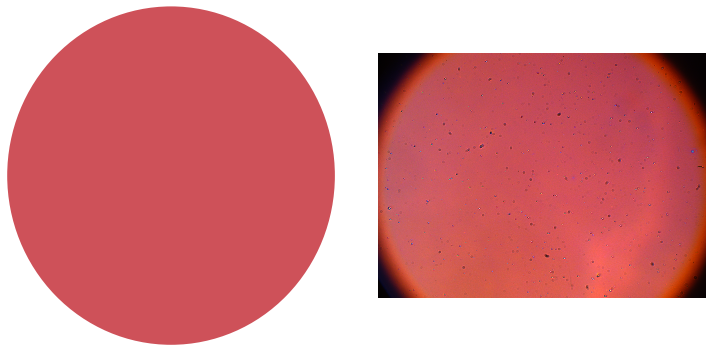

lu


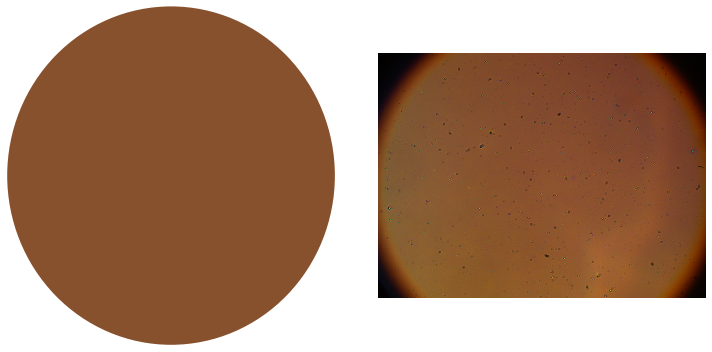

sd


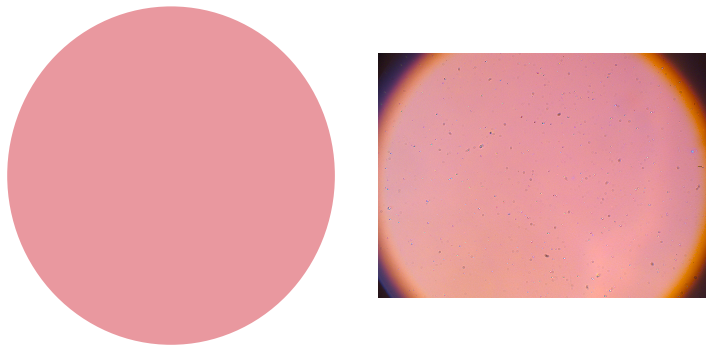

su


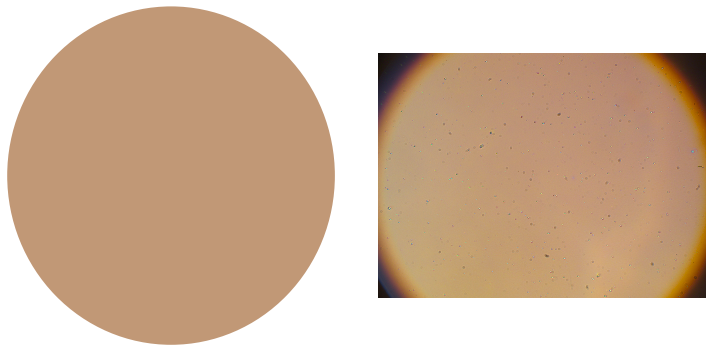

In [5]:
sample_type = 'B'
samplefile = sample_type + '10'
image_type = 'ld' # ld lu sd su
print(image_type)
im = Image(datadir + samplefile + image_type + '.tiff', regime='selective', fast=True)
im.show()
image_type = 'lu' # ld lu sd su
print(image_type)
im = Image(datadir + samplefile + image_type + '.tiff', regime='selective', fast=True)
im.show()
image_type = 'sd' # ld lu sd su
print(image_type)
im = Image(datadir + samplefile + image_type + '.tiff', regime='selective', fast=True)
im.show()
image_type = 'su' # ld lu sd su
print(image_type)
im = Image(datadir + samplefile + image_type + '.tiff', regime='selective', fast=True)
im.show()

In [7]:
#samples = b_samples[5:] + d_samples[4:]
samples = a_samples + b_samples
samples = np.array(samples)

In [8]:
samples.__len__()

50

In [10]:
np.save(METADATA + 'ab_samples_lu.npy', samples)

0.000395569477192


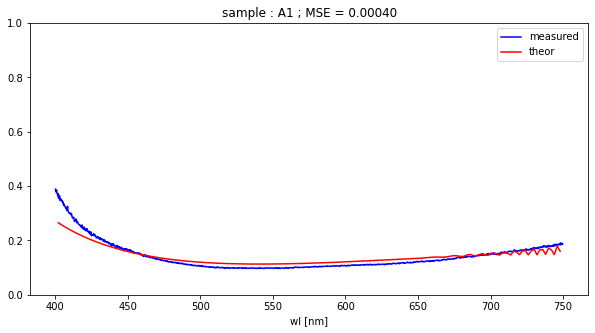

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000191479789618


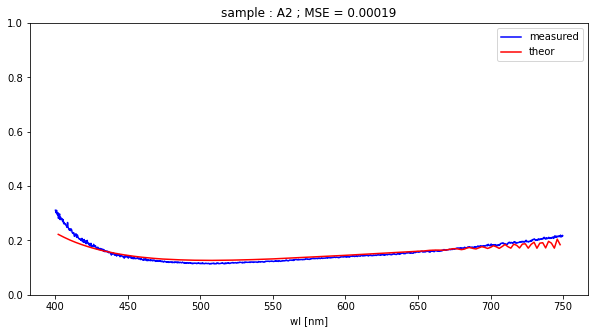

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000474328988458


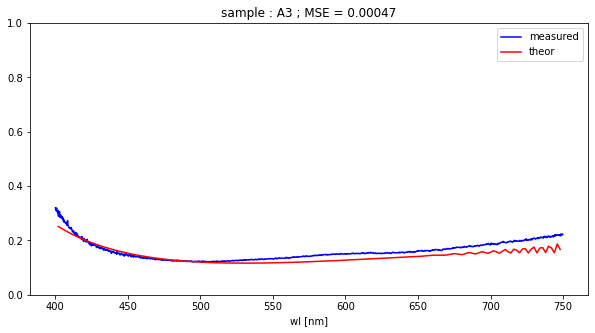

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000192028738653


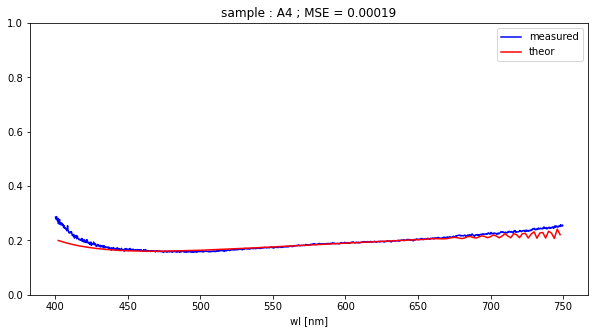

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000409077266334


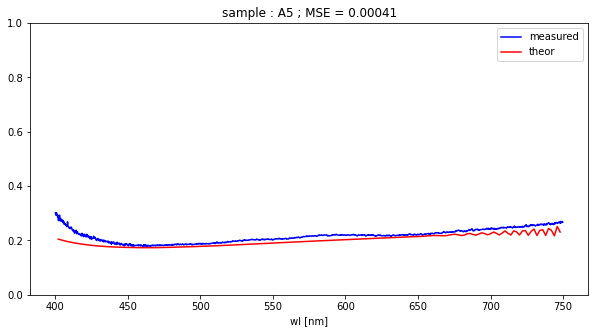

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00111810284153


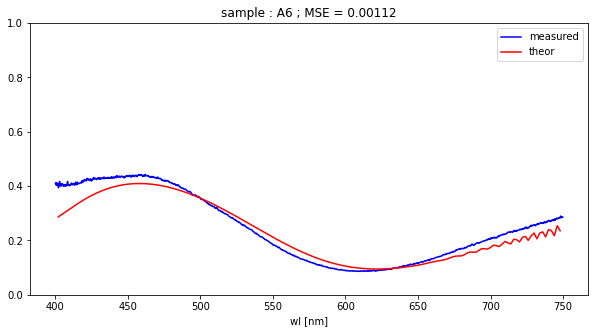

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000963639376789


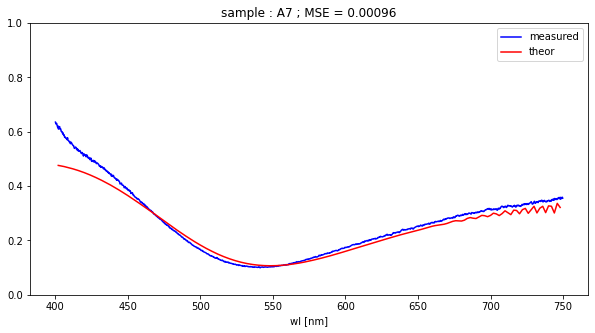

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000677558057746


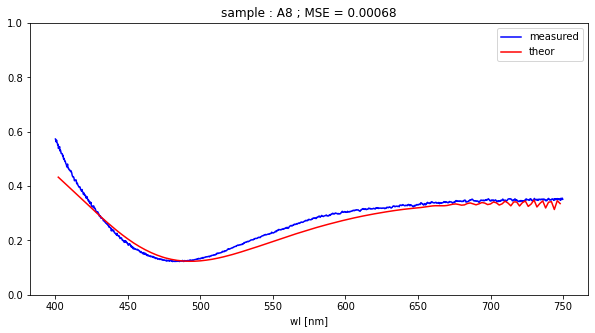

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000630056106089


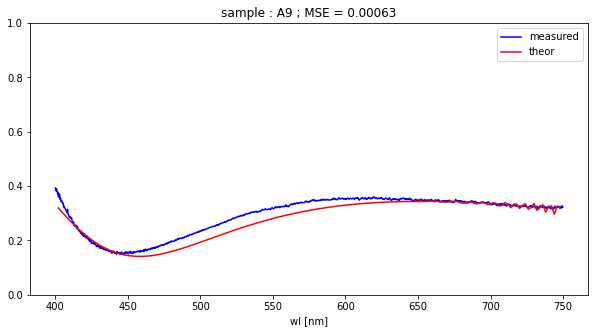

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000449864194497


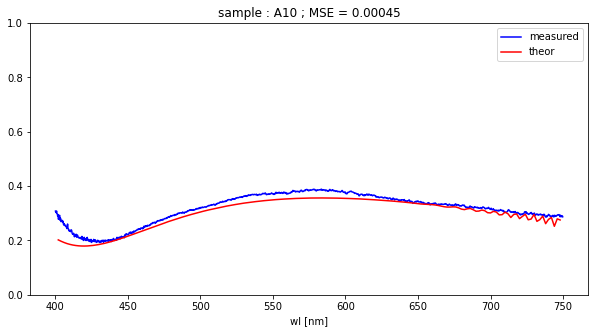

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.0011579488838


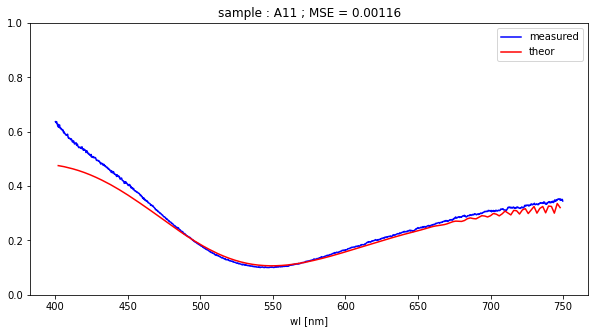

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000939115976279


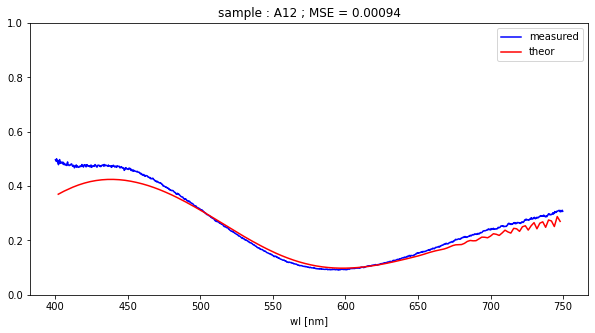

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00120159038829


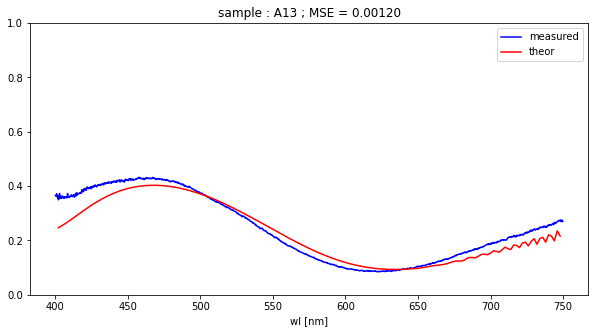

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000671995559247


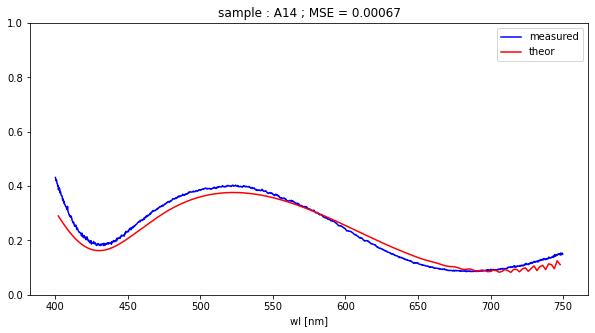

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00105359410583


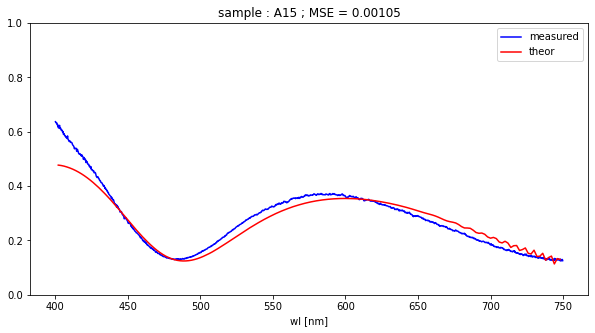

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00126470084286


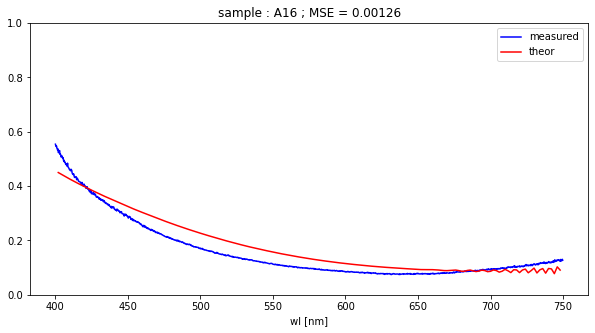

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000456507087175


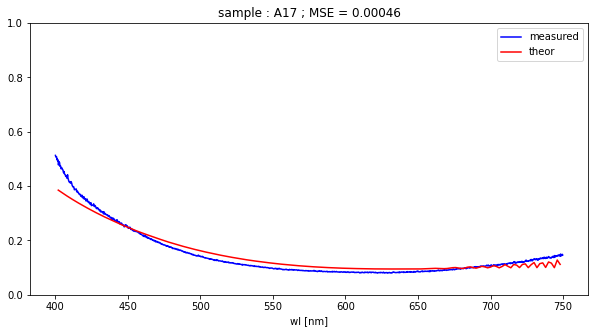

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000332427864639


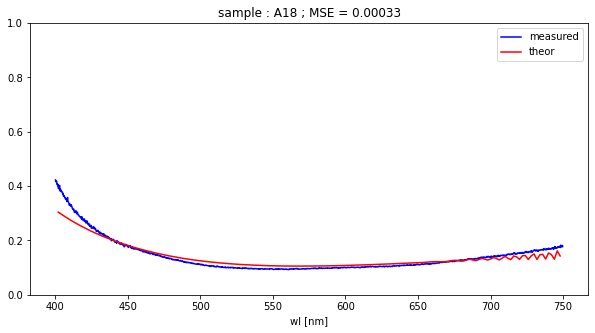

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000336438183822


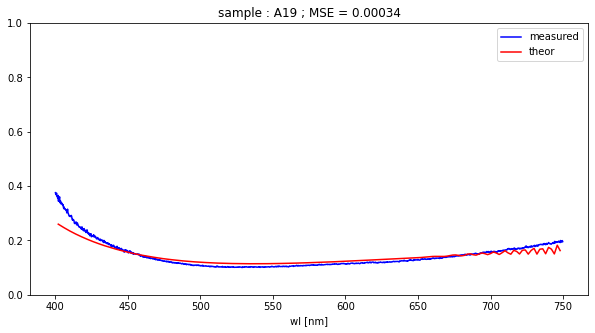

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00104805388481


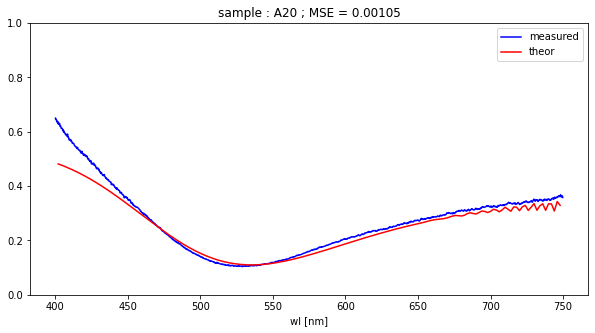

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000853346058658


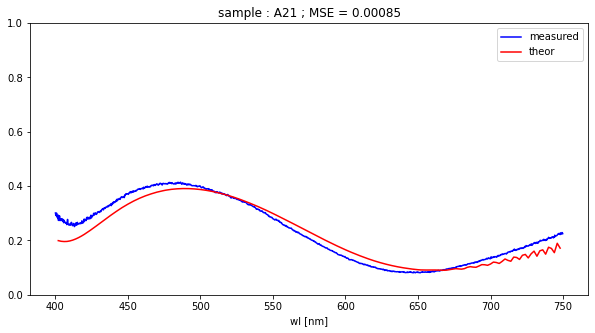

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000453786358727


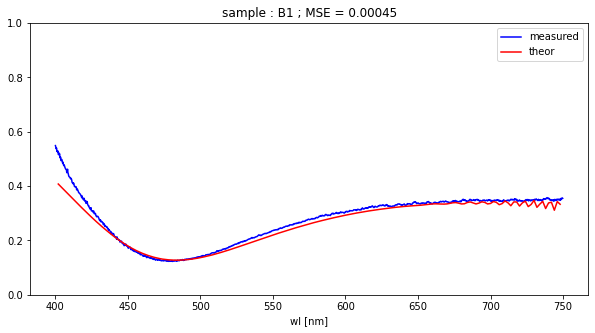

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000720706039491


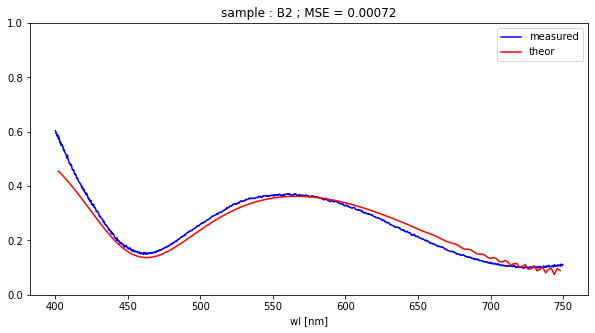

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000716523441449


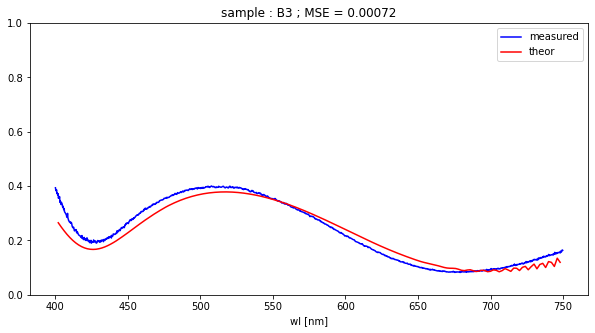

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00101676699247


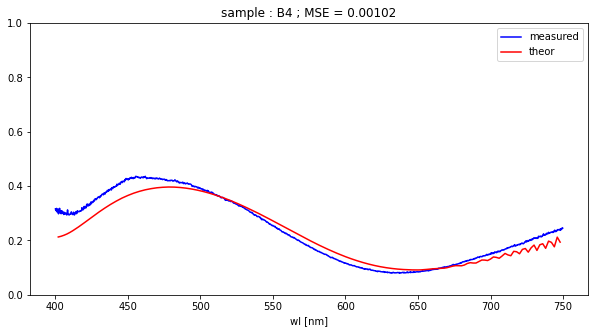

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00123474234277


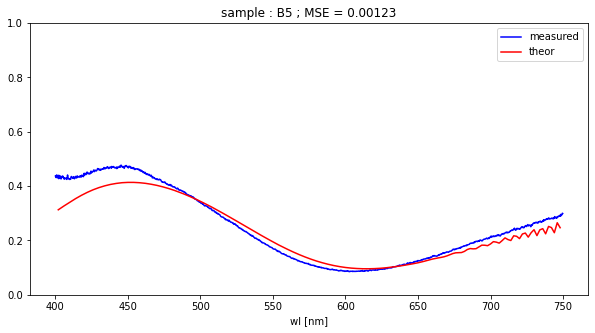

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00102375212066


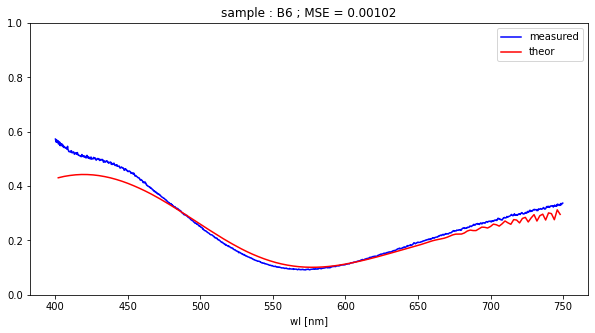

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00101001029128


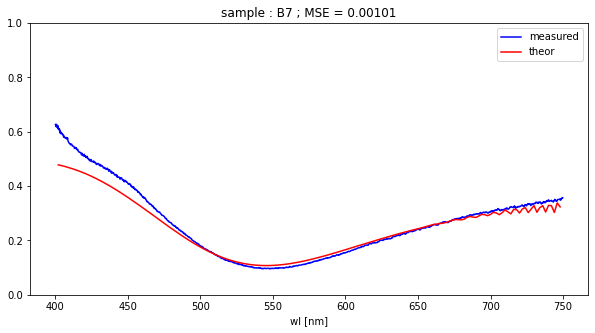

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000805218823818


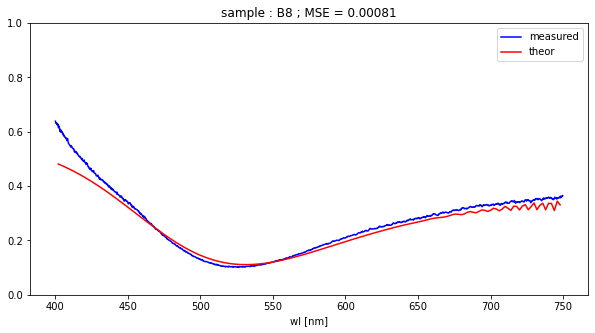

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000703498205327


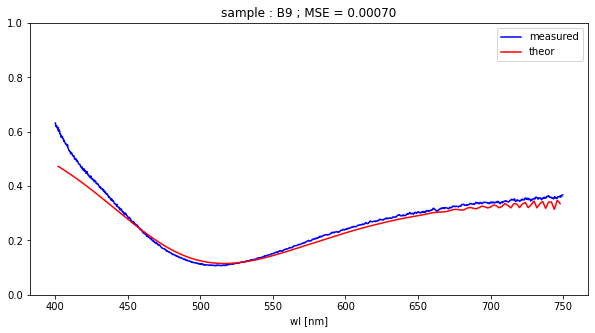

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000704392801194


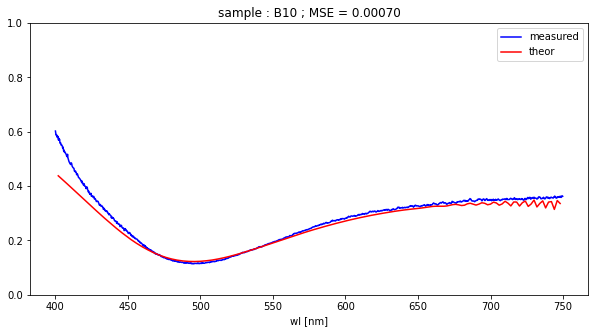

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000837165928423


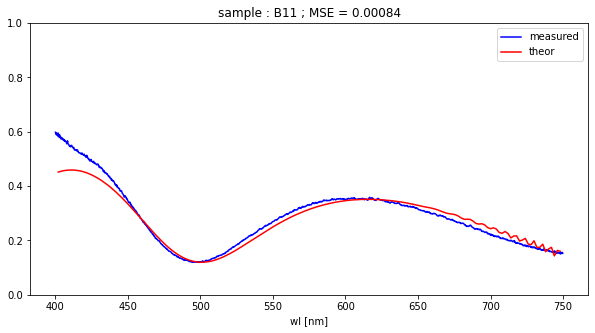

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000478913773649


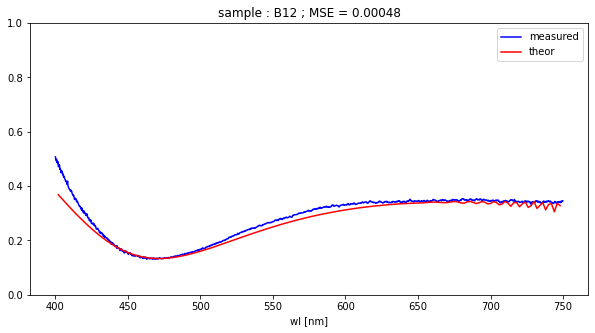

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000475796098693


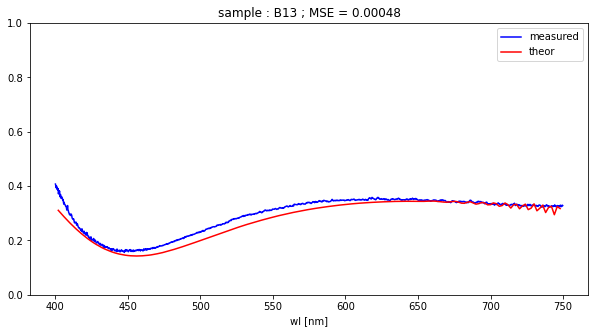

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000423676808136


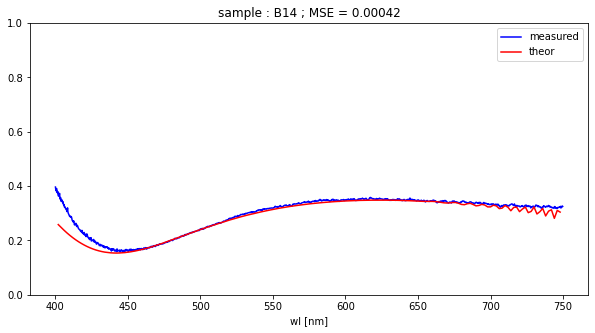

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000807992066592


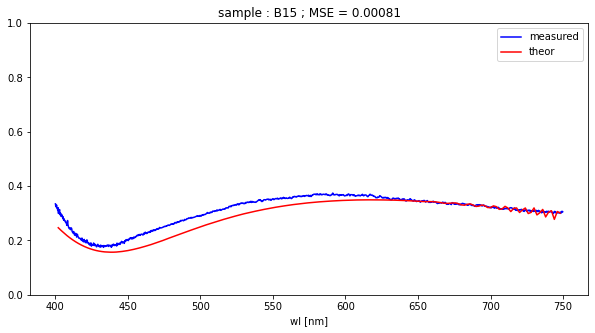

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.0005281274572


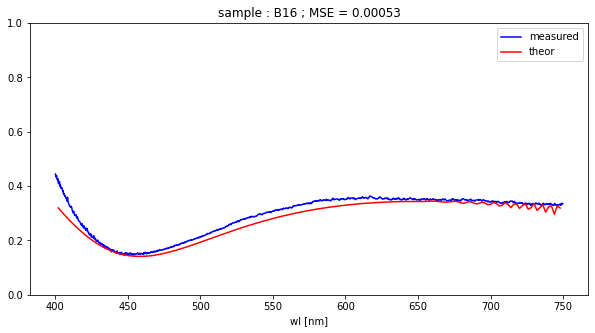

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000628852511372


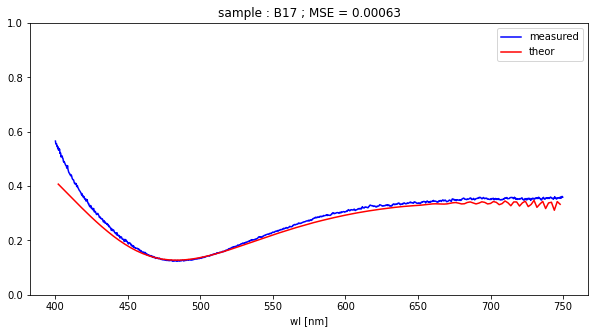

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000811826407276


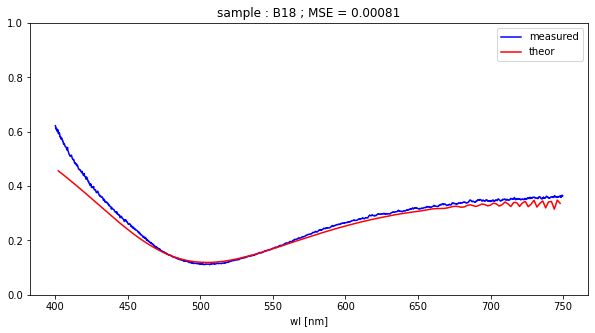

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000667925751353


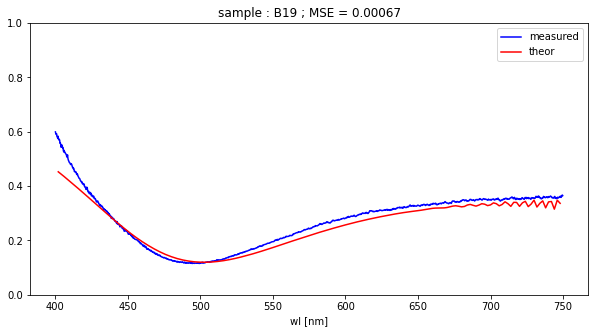

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000780202804355


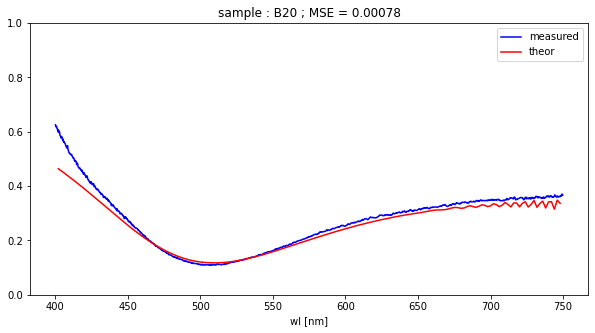

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000878349163638


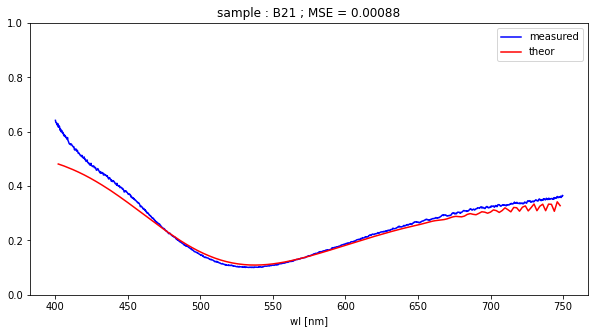

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000875515715339


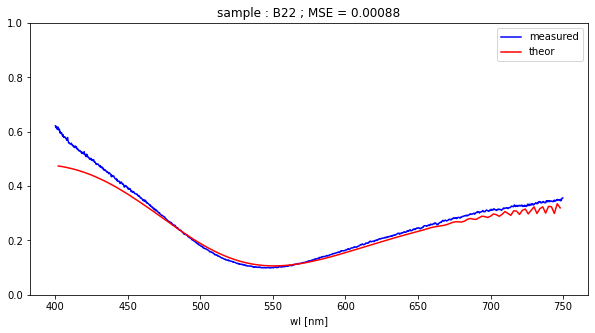

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00111169169944


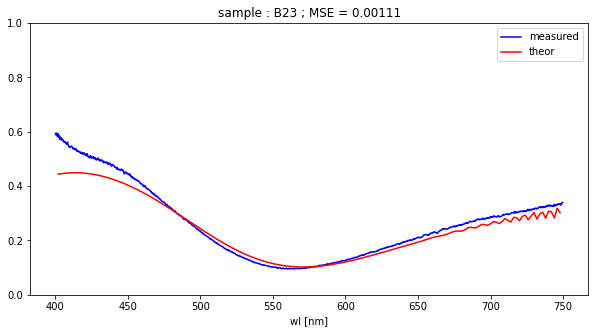

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000932860673838


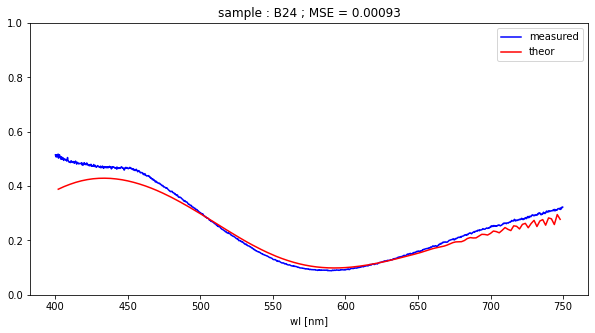

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000763163660312


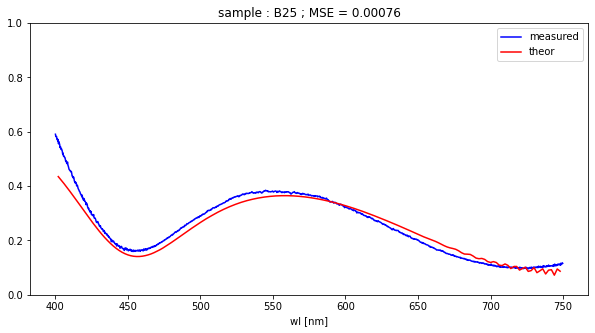

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000585665277203


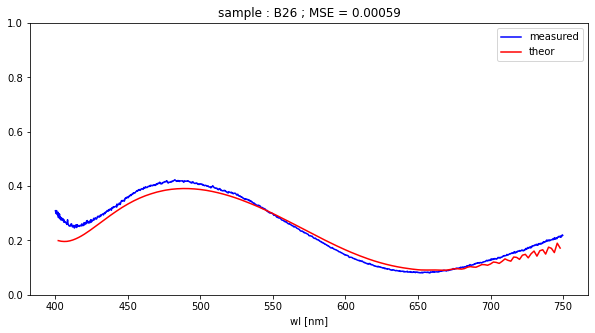

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000635563588603


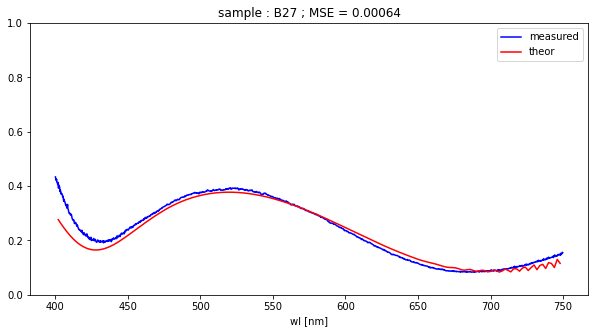

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.000806002428576


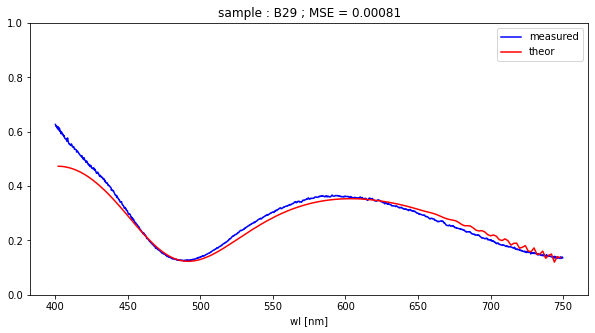

  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 277, in usage_warning
    warning(*args, **kwargs)
  File "/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py", line 221, in warning
    warn(*args, **kwargs)
/home/makam0a/anaconda3/envs/prima/lib/python3.7/site-packages/colour/utilities/verbose.py:221: ColourUsageWarning: "colour.ILLUMINANTS_RELATIVE_SPDS" object

0.00176722367431


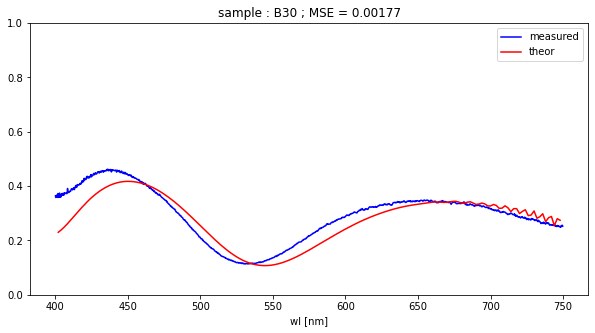

0.000760066731556


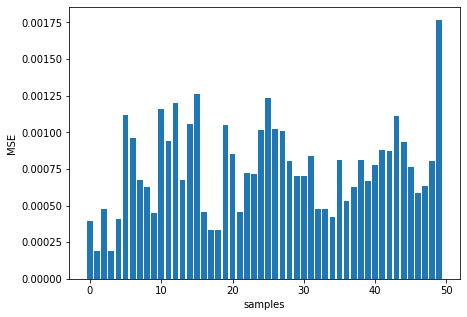

In [12]:
#samples = ab_samples
mse_s = []
result_dir = METADATA + 'results/gt_vs_measured/'

for i, sample in enumerate(samples):
    theor_sp = SpectraTheory(sample.thickness, pmma_file='PMMA_nam_dispersion.txt')
    plt.figure(figsize=[10,5])
    plt.plot(sample.spectra.wl,sample.spectra.intensity,'b', label='measured')
    plt.plot(theor_sp.wl,theor_sp.intensity,'r', label='theor')
    plt.legend()
    plt.ylim(0,1)
    plt.xlabel('wl [nm]')
    curr_mse = MSE(sample.spectra.f(theor_sp.wl),theor_sp.f(theor_sp.wl))
    mse_s.append(curr_mse)
    plt.title('sample : ' + sample.filename + ' ; MSE = %.5f' % curr_mse)
    print(curr_mse)
    plt.savefig(result_dir+sample.filename+'.png')
    plt.show()
    plt.close()

plt.figure(figsize=[7,5])
print(np.array(mse_s).mean())
plt.bar(np.arange(mse_s.__len__()),mse_s)
plt.xlabel('samples')
plt.ylabel('MSE')
plt.savefig(result_dir+'AB_hist'+'.png')
plt.show()
plt.close()

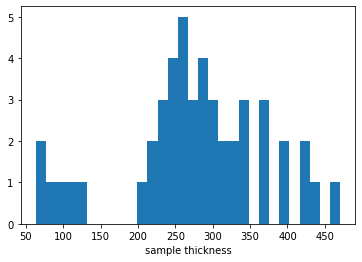

In [13]:
thicknesses = np.array([sample.thickness for sample in samples])
for i,sample in enumerate(samples[:]):
    samples[i].X = sample.spectra.intensity
    samples[i].Y = sample.image.RGB
plt.hist(thicknesses[3:],bins=30)
plt.xlabel('sample thickness')
plt.show()

In [10]:
image_type = 'lu'

val_score = 1.56697519066e-05
score = 1.28624255237e-05


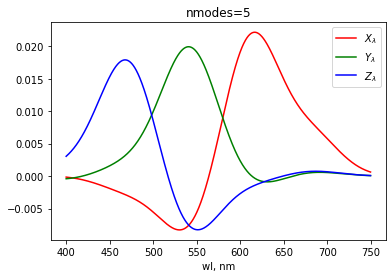

In [14]:
#samples = np.load("new_samples.npy", allow_pickle=True)
idx = np.arange(len(samples),dtype=np.int32)
train=np.random.choice(idx,int(len(samples)*0.8),replace=False)
test=np.setdiff1d(idx, train)
train = samples[train]
test=samples[test]
camera=CameraCalibration(train,nmodes=5,fitting='gaussian',
                         regression=LinearRegression,
                         fitting_params={'sigma' : 180})
camera_file = METADATA + 'camera_' + image_type + '_new.npy'
#camera.save(camera_file)
#camera = CameraCalibration.load(camera_file)
score = camera.score(test)
print('val_score = ' + str(score))
score = camera.score(samples)
print('score = ' + str(score))
camera.show()

A1
[ 0.19413671  0.19344769  0.16519983]
[ 0.19683241  0.19186188  0.16714363]
4.51999968094e-06


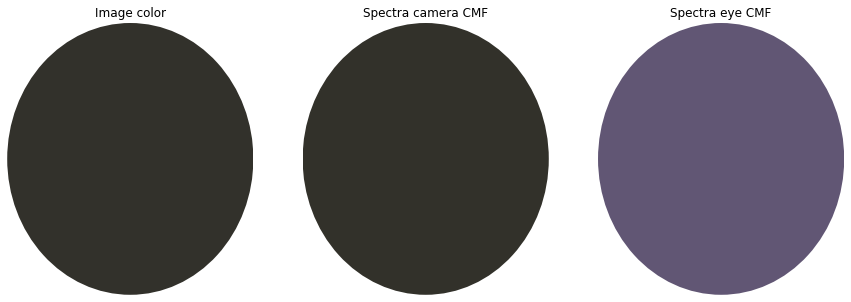

A2
[ 0.25471986  0.22534381  0.13191143]
[ 0.25720368  0.2265389   0.12921091]
4.96345618195e-06


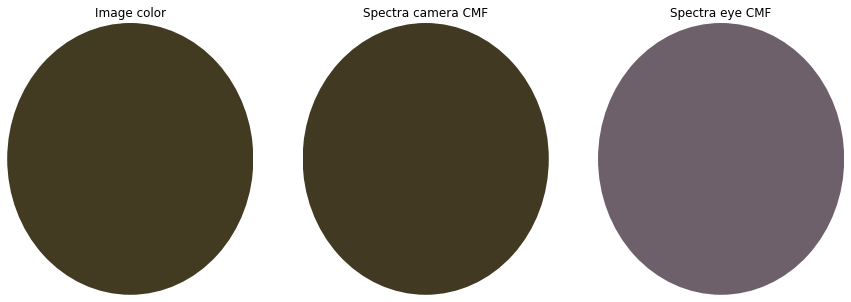

A3
[ 0.26304987  0.2397907   0.1348764 ]
[ 0.26445982  0.23855957  0.13516005]
1.19469702113e-06


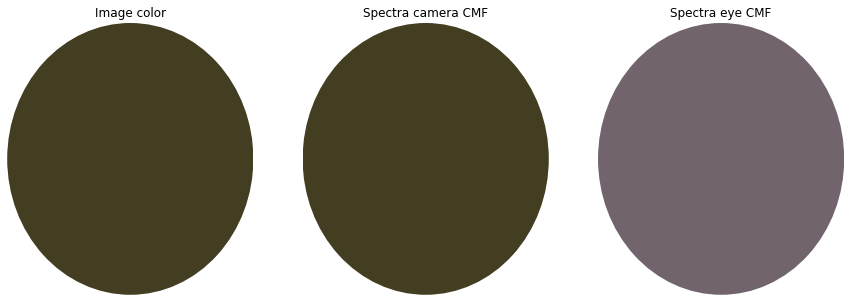

A4
[ 0.32320828  0.30430796  0.14273303]
[ 0.32650364  0.31158382  0.13935518]
2.50691449959e-05


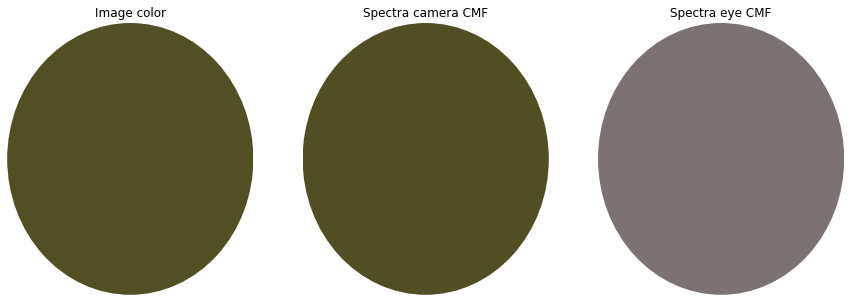

A5
[ 0.35082447  0.35318843  0.15528271]
[ 0.35131204  0.35398029  0.15997369]
7.62334726087e-06


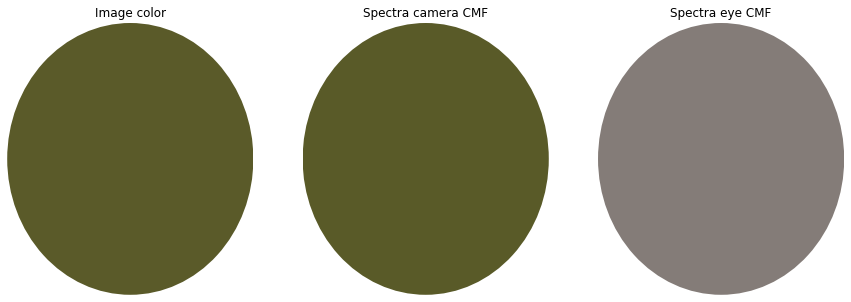

A6
[ 0.07267293  0.42301407  0.46145147]
[ 0.0706966   0.42288829  0.46910499]
2.08326625181e-05


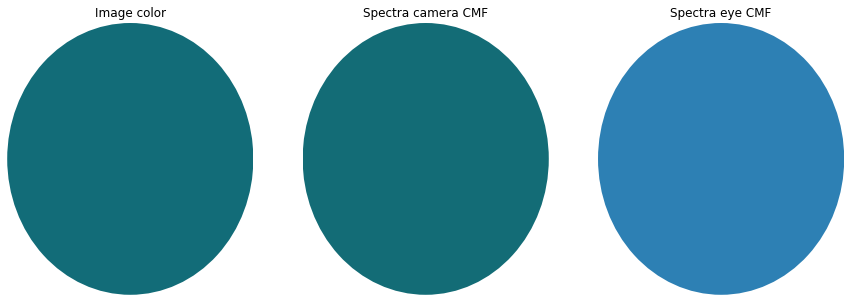

A7
[ 0.36533786  0.25398486  0.38202724]
[ 0.36630483  0.25528027  0.38492714]
3.67418225108e-06


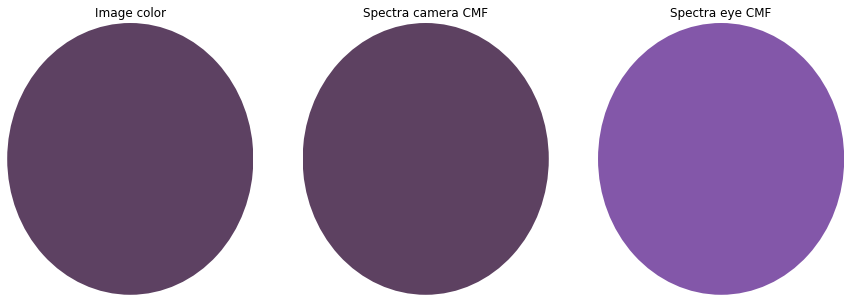

A8
[ 0.55306099  0.35938169  0.13995982]
[ 0.55762239  0.36437726  0.14231986]
1.71106484173e-05


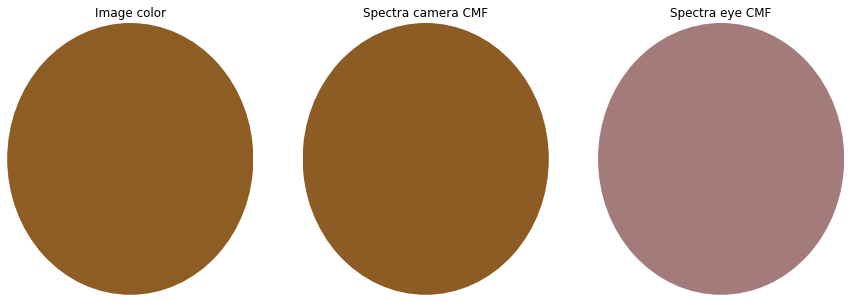

A9
[ 0.56013207  0.49884895  0.0969429 ]
[ 0.56108956  0.49996446  0.09663888]
7.51193451927e-07


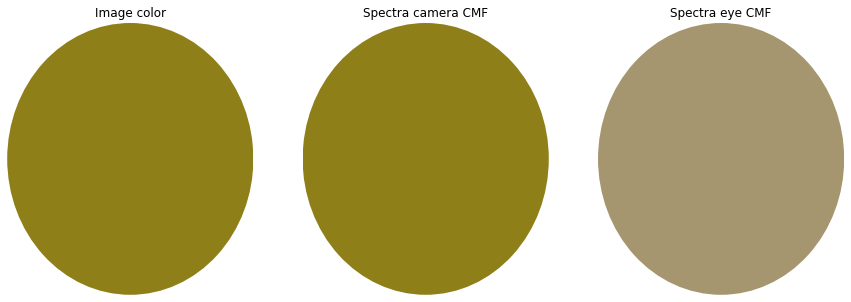

A10
[ 0.52415336  0.60245136  0.15403097]
[ 0.5205512   0.59167315  0.16243071]
6.65669687259e-05


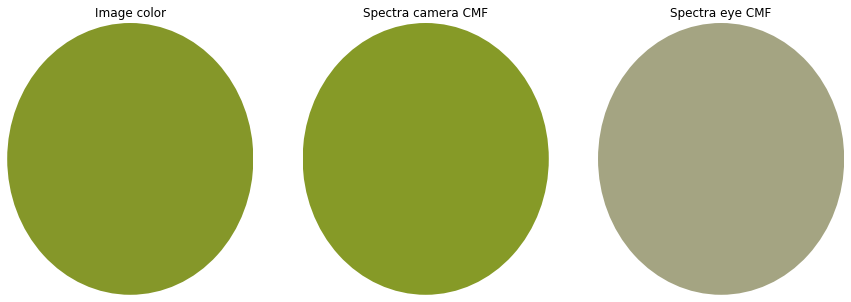

A11
[ 0.34459964  0.26022437  0.40702744]
[ 0.34275898  0.25926842  0.4139559 ]
1.74351664928e-05


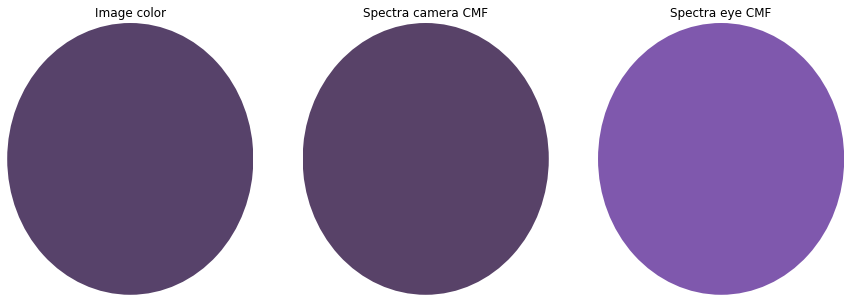

A12
[ 0.13356367  0.36498404  0.48364046]
[ 0.13338776  0.36630044  0.48872732]
9.21333568461e-06


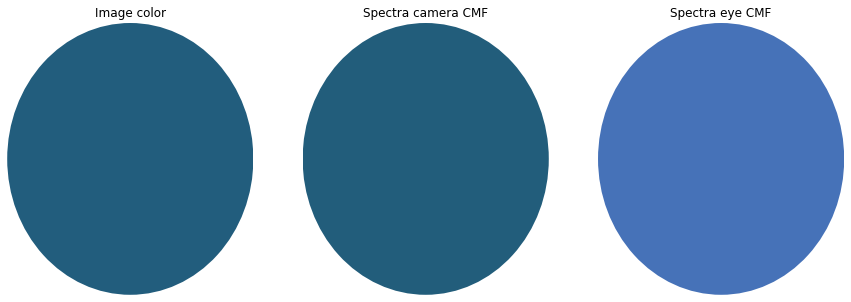

A13
[ 0.05160448  0.46174168  0.44021382]
[ 0.0475301   0.46342143  0.44743814]
2.38709466471e-05


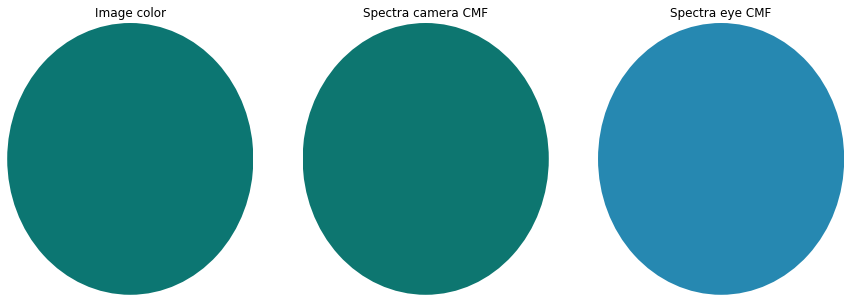

A14
[ 0.13759202  0.6149022   0.20991705]
[ 0.13613048  0.61741173  0.21754948]
2.22292741894e-05


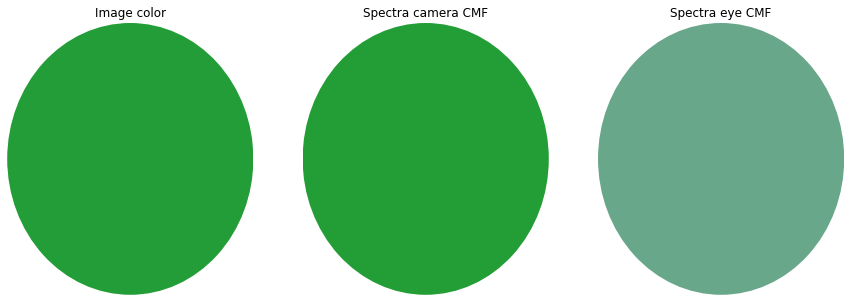

A15
[ 0.48356672  0.47024508  0.16151977]
[ 0.48071127  0.46801998  0.16411474]
6.61284014596e-06


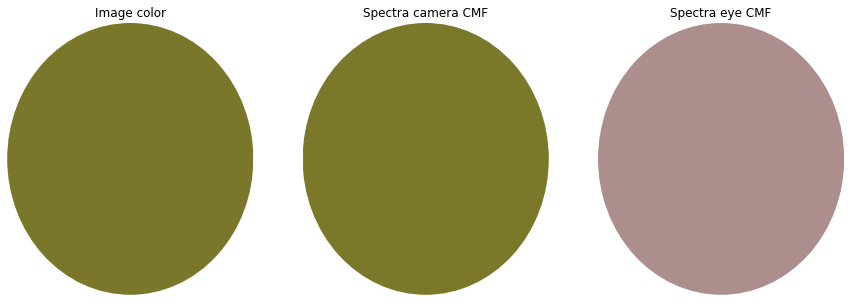

A16
[ 0.08779258  0.245211    0.29754617]
[ 0.08456412  0.24447701  0.30435861]
1.91236747619e-05


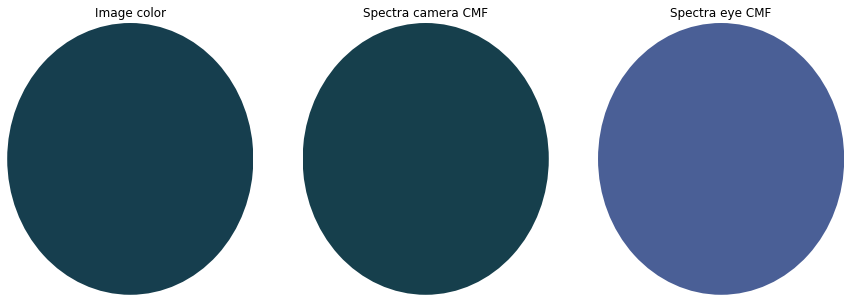

A17
[ 0.11297865  0.21276733  0.25846781]
[ 0.11079064  0.21039498  0.26143072]
6.39810773269e-06


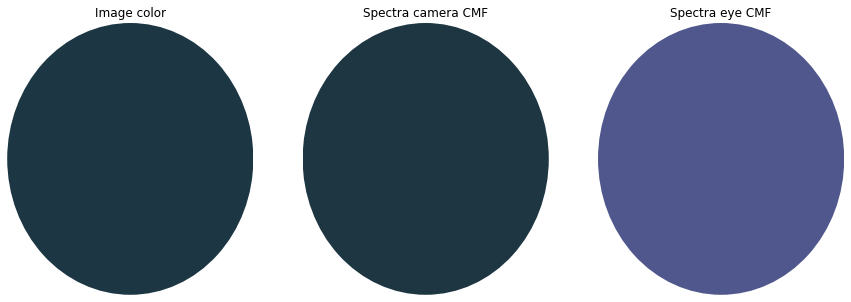

A18
[ 0.17464747  0.193112    0.18621225]
[ 0.17065521  0.18903928  0.19017441]
1.60746063258e-05


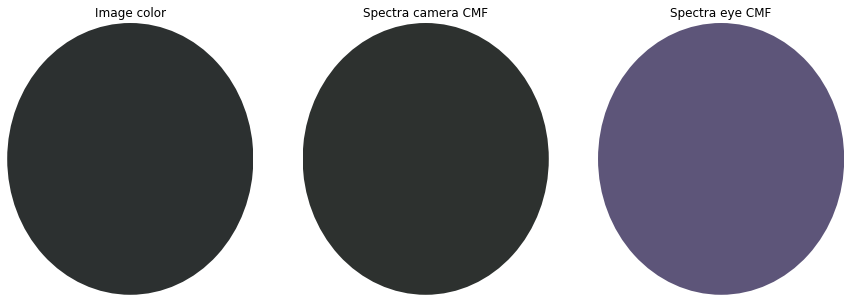

A19
[ 0.20777947  0.19972281  0.15905677]
[ 0.20637157  0.19744808  0.15732901]
3.38057655836e-06


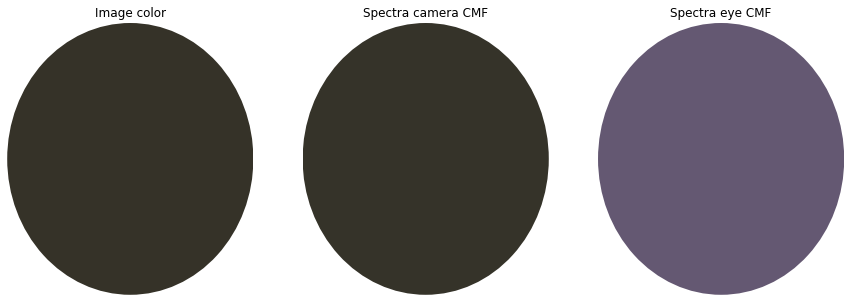

A20
[ 0.42046113  0.25662433  0.33760555]
[ 0.41755536  0.25255472  0.34065805]
1.14409815455e-05


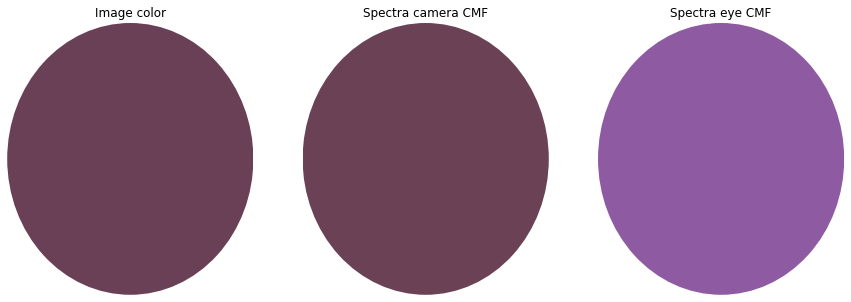

A21
[ 0.03898958  0.5356467   0.3610622 ]
[ 0.0362775   0.53294785  0.35802947]
7.94555474176e-06


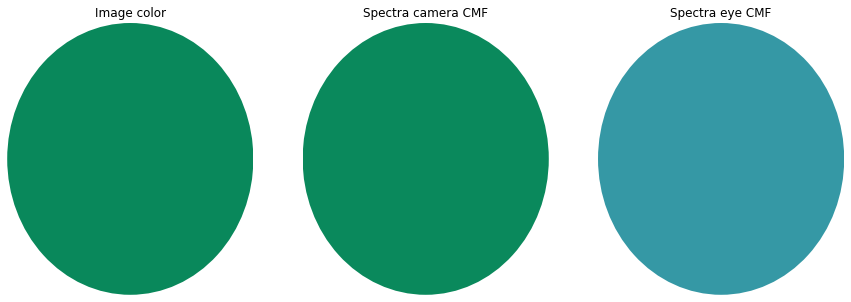

B1
[ 0.5566208   0.36677012  0.12952345]
[ 0.56051217  0.37298923  0.12849489]
1.82926767999e-05


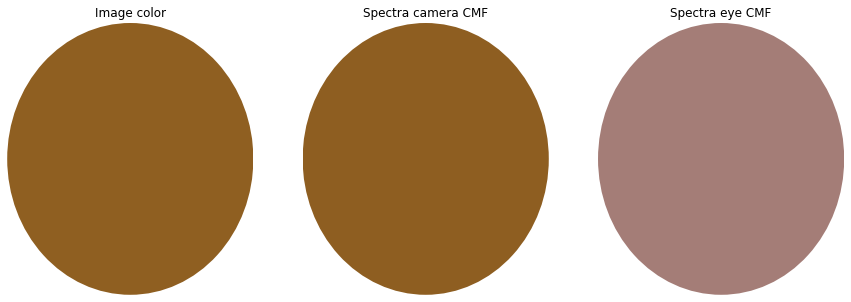

B2
[ 0.34292111  0.55000079  0.11812664]
[ 0.34793212  0.5535925   0.11837929]
1.26915093992e-05


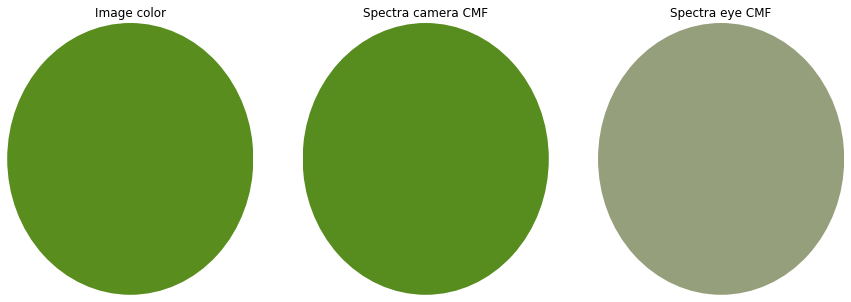

B3
[ 0.10781171  0.60237711  0.24086993]
[ 0.10843261  0.60798239  0.24185517]
1.09251135961e-05


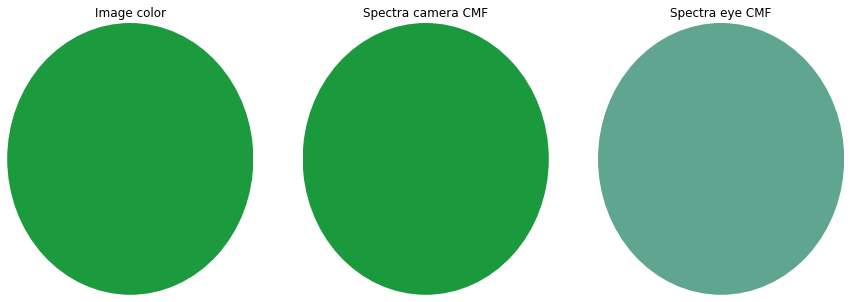

B4
[ 0.03050012  0.50759983  0.41229503]
[ 0.03077852  0.50930289  0.40125183]
4.16433654992e-05


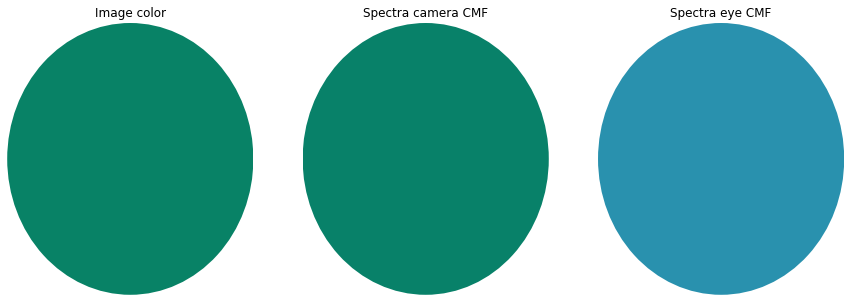

B5
[ 0.08364862  0.40180312  0.48034712]
[ 0.08734859  0.40280792  0.47250393]
2.54049915307e-05


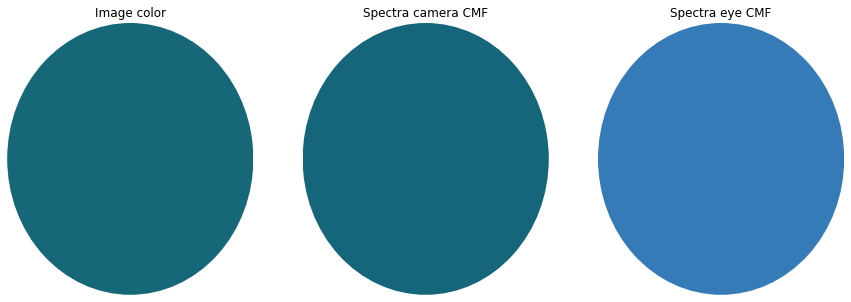

B6
[ 0.21949143  0.29709682  0.46873903]
[ 0.22595145  0.29651653  0.46575637]
1.69882836037e-05


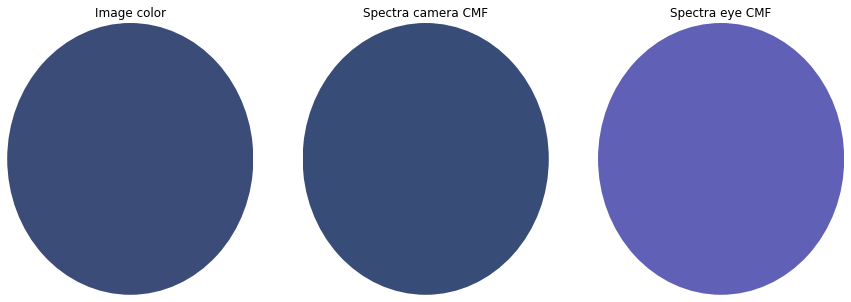

B7
[ 0.33459444  0.25440969  0.40718718]
[ 0.34070648  0.25414388  0.40577517]
1.31404610266e-05


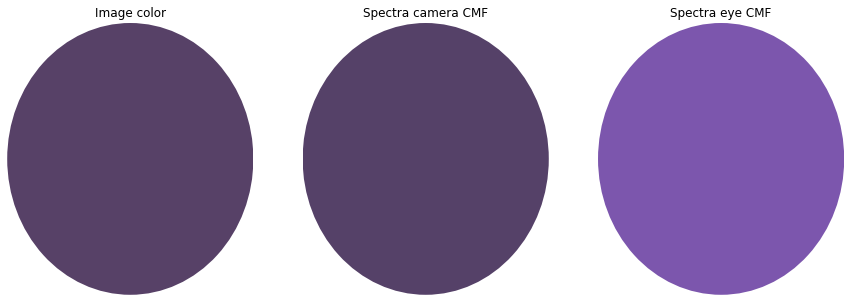

B8
[ 0.43922664  0.25290426  0.31792657]
[ 0.4412252   0.25346718  0.31927988]
2.04752124357e-06


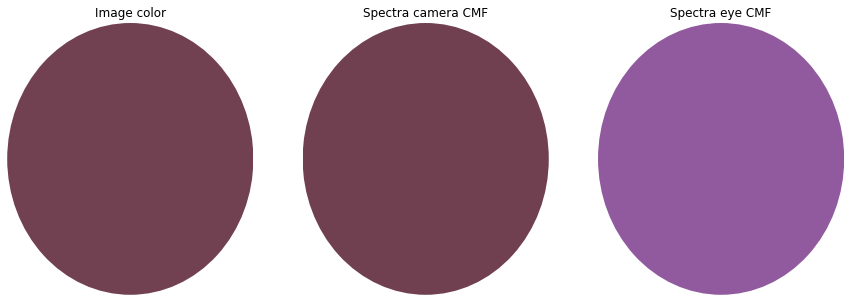

B9
[ 0.48810563  0.27318578  0.25154571]
[ 0.49116925  0.27705149  0.25055033]
8.44009741923e-06


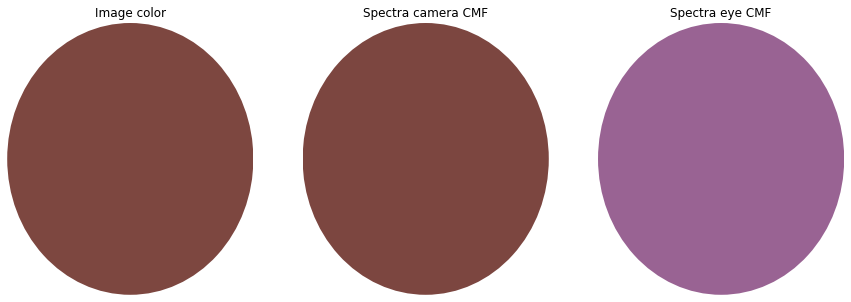

B10
[ 0.54126384  0.3157924   0.18223626]
[ 0.53528589  0.31707636  0.1821775 ]
1.24626115537e-05


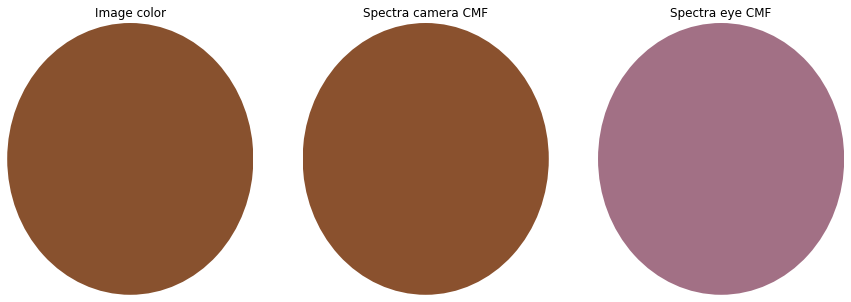

B11
[ 0.52661677  0.40305826  0.22884824]
[ 0.5274363   0.40676134  0.22420921]
1.19683539313e-05


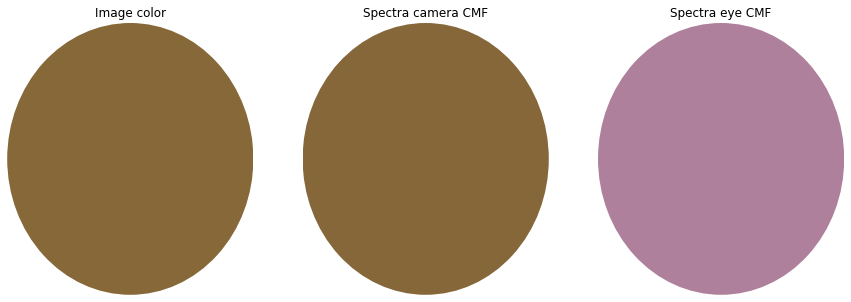

B12
[ 0.57144758  0.4152871   0.10258305]
[ 0.57434608  0.41933488  0.10302002]
8.32558283584e-06


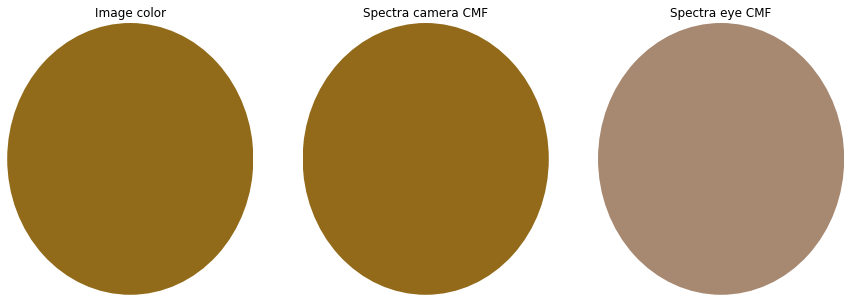

B13
[ 0.55762314  0.49274263  0.10384034]
[ 0.56229245  0.49619799  0.10130036]
1.3397838878e-05


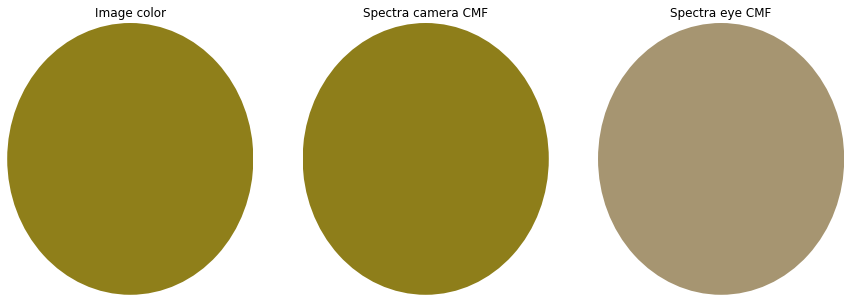

B14
[ 0.55274422  0.50295685  0.10542894]
[ 0.55636951  0.51651355  0.10143837]
7.09504276085e-05


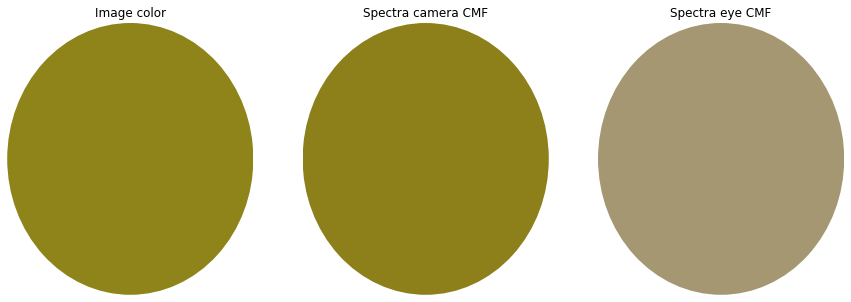

B15
[ 0.5371674   0.56469602  0.13633244]
[ 0.53732545  0.56405971  0.13487035]
8.55865613271e-07


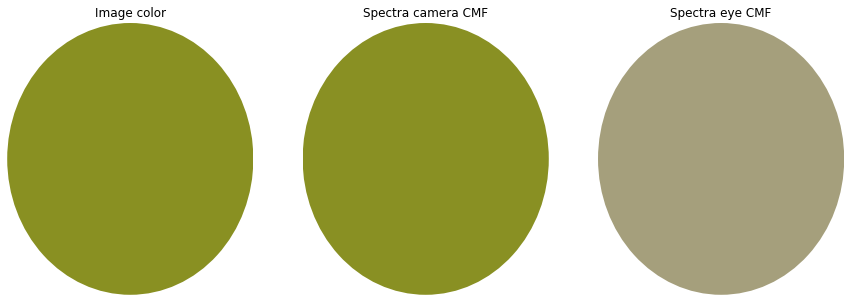

B16
[ 0.57294038  0.4776706   0.09492843]
[ 0.57182336  0.47260068  0.09559045]
9.13003437638e-06


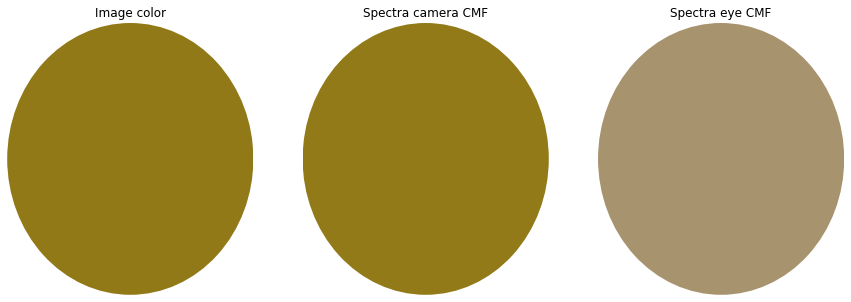

B17
[ 0.56381281  0.35974177  0.14042197]
[ 0.56072782  0.35893113  0.1388271 ]
4.23931308516e-06


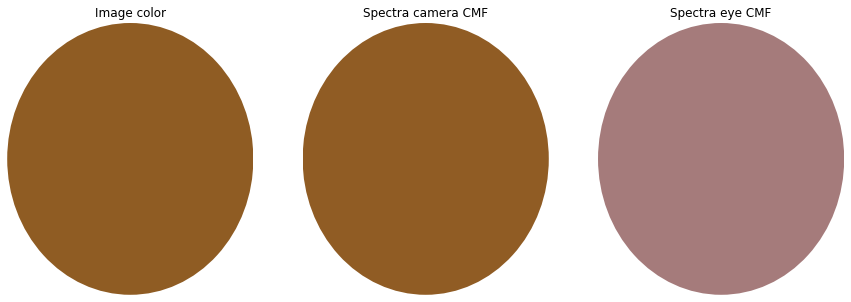

B18
[ 0.520844    0.29362384  0.22155816]
[ 0.51776198  0.29074485  0.22071279]
6.16734665205e-06


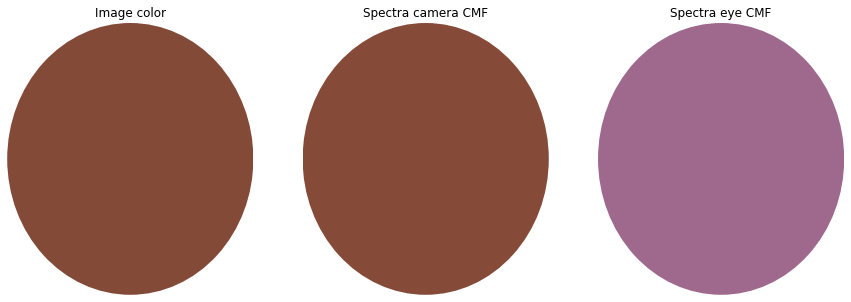

B19
[ 0.54230555  0.31814842  0.18060749]
[ 0.54132772  0.31836508  0.17833968]
2.04869098728e-06


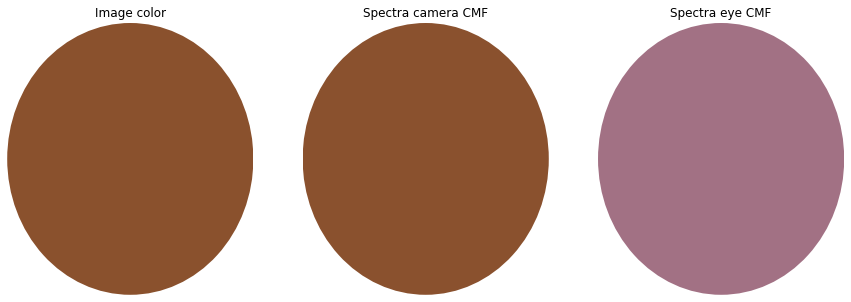

B20
[ 0.51187058  0.28484018  0.2323552 ]
[ 0.50850341  0.28325652  0.23214404]
4.63013718991e-06


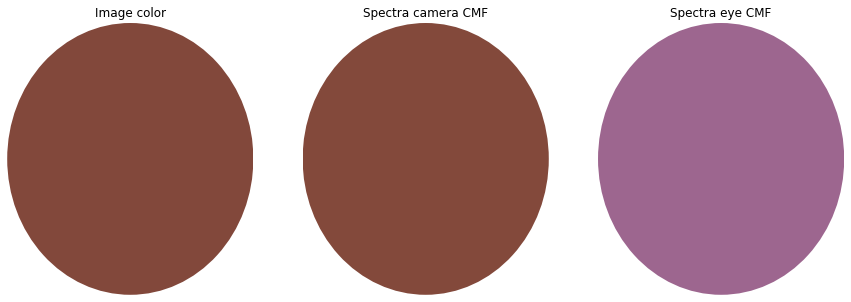

B21
[ 0.39965775  0.24964245  0.35631514]
[ 0.39769909  0.25062856  0.35518652]
2.02751705178e-06


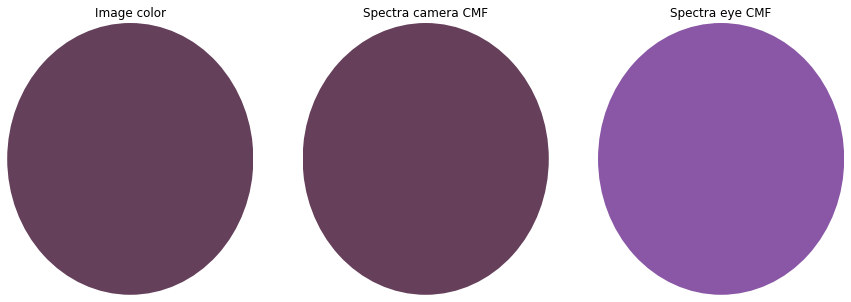

B22
[ 0.34671468  0.2585248   0.39845066]
[ 0.34425302  0.25634068  0.39980712]
4.22337101468e-06


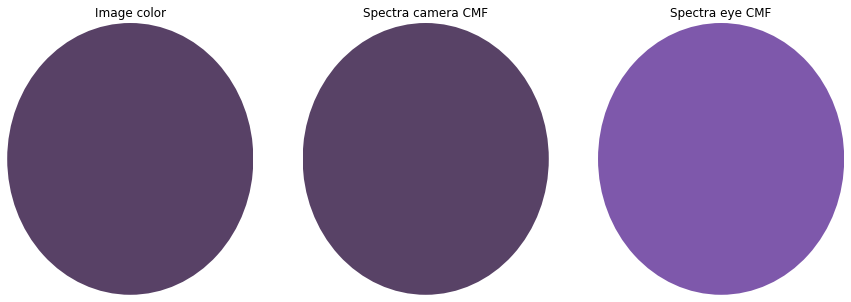

B23
[ 0.25898457  0.28538517  0.45609584]
[ 0.26108346  0.28562299  0.45583893]
1.50929548643e-06


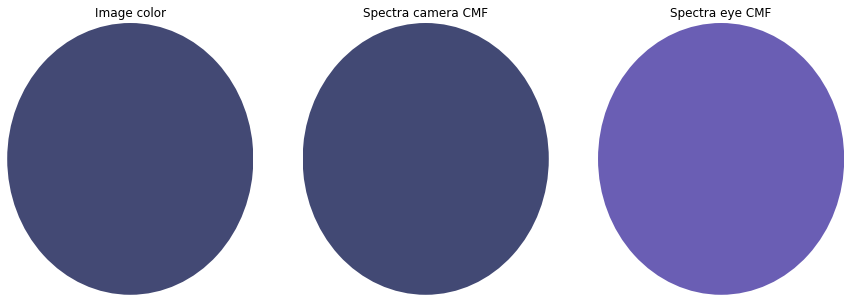

B24
[ 0.14827177  0.34655453  0.48661904]
[ 0.14994137  0.34527075  0.48130749]
1.08827553418e-05


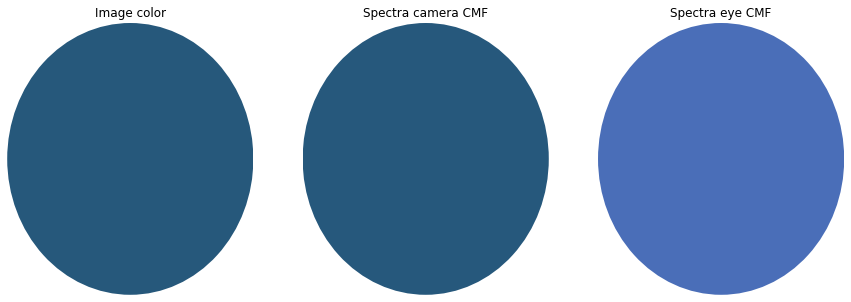

B25
[ 0.31198368  0.57918692  0.12151856]
[ 0.31673886  0.57396255  0.12344986]
1.78785634302e-05


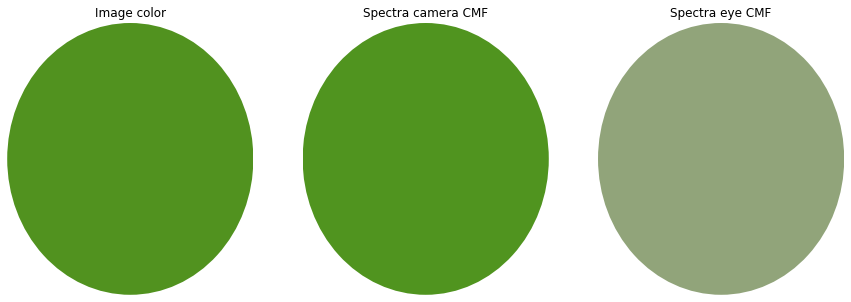

B26
[ 0.03993721  0.55540414  0.35126705]
[ 0.03802573  0.55218583  0.34857644]
7.08352886443e-06


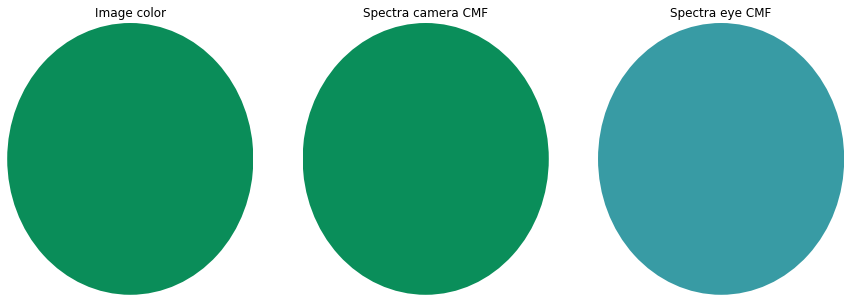

B27
[ 0.13763882  0.59981787  0.21339322]
[ 0.13856683  0.60298398  0.21037988]
6.65522759021e-06


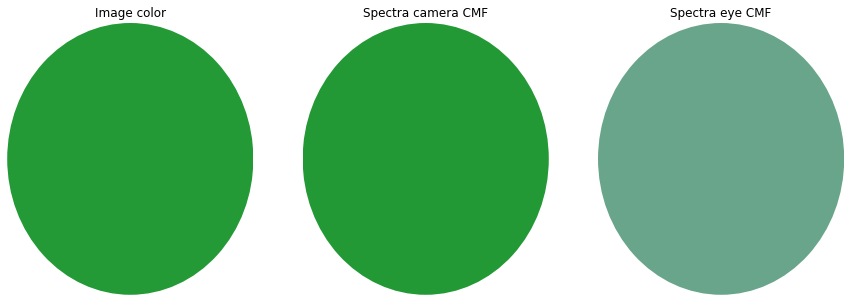

B29
[ 0.50372141  0.44351428  0.18520096]
[ 0.50211098  0.442765    0.18353333]
1.97862357162e-06


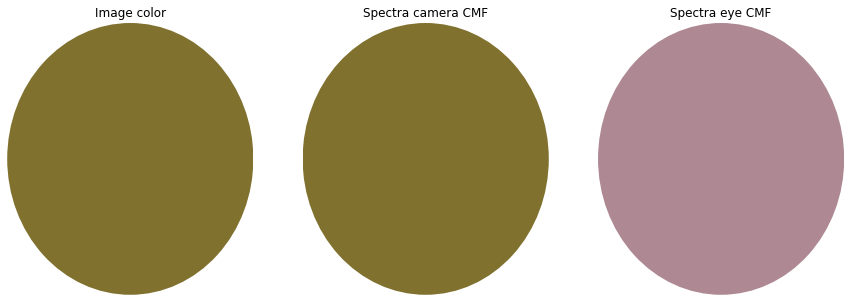

B30
[ 0.51889531  0.32309118  0.39780284]
[ 0.51851697  0.32409928  0.39926674]
1.10080567302e-06


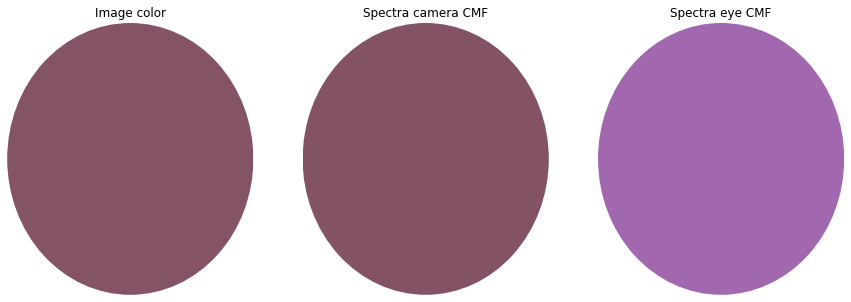

In [16]:
mses = []
for sample in samples:
    if sample in test:
        stype='TEST'
    elif sample in train:
        stype='TRAIN'
    else:
        ValueError("Unrecognized type!")
    plt.figure(figsize=[15,5])
    RGB=camera.spectra_to_XYZ(sample.spectra.wl,
                          sample.spectra.intensity)
    RGB_image = sample.image.RGB
    RGB_spectra = sample.spectra.color.RGB
    print(sample.filename)
    print(np.array(RGB))
    print(RGB_image)
    curr_mse = MSE(np.array(RGB),RGB_image)
    print(curr_mse)
    mses.append(curr_mse)
    plt.subplot(1,3,1)
    plt.title('Image color')
    Spectra.show_calculated_color(RGB_image)
    plt.subplot(1,3,2)
    plt.title('Spectra camera CMF')
    Spectra.show_calculated_color(np.clip(np.array(RGB),0,1))
    plt.subplot(1,3,3)
    plt.title('Spectra eye CMF')
    Spectra.show_calculated_color(RGB_spectra)
    plt.savefig(METADATA + 'results/colors/'+sample.filename+'-'+image_type+'.png')
    plt.show()
    plt.close()

Text(0.5, 0, 'samples')

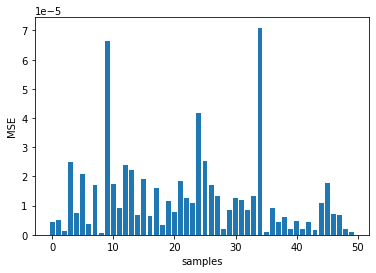

In [17]:
plt.bar(np.arange(len(mses)),mses)
plt.ylabel('MSE')
plt.xlabel('samples')